`CENTERAL LIMIT THEREOM`
- The Central Limit Thereom (`CLT`) states that the distribution of sample means of a large number of Independent and Identically distributed random variables will appraoch a normal distribution regardless of the `underlying distribution of the Variables`

`Assumptions of the CLT`
* The Sample Size is Large enough , typically greater than or equal to 30. 
* The sample is drawn from a finite population  or infinite population with a finite variance
* The Random Variables are Independent and identically distributed
  

In [1]:
## importing neccessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import gamma
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,5)
from rich.console import Console
console = Console()

`Generating the data from a Gamma distribution`

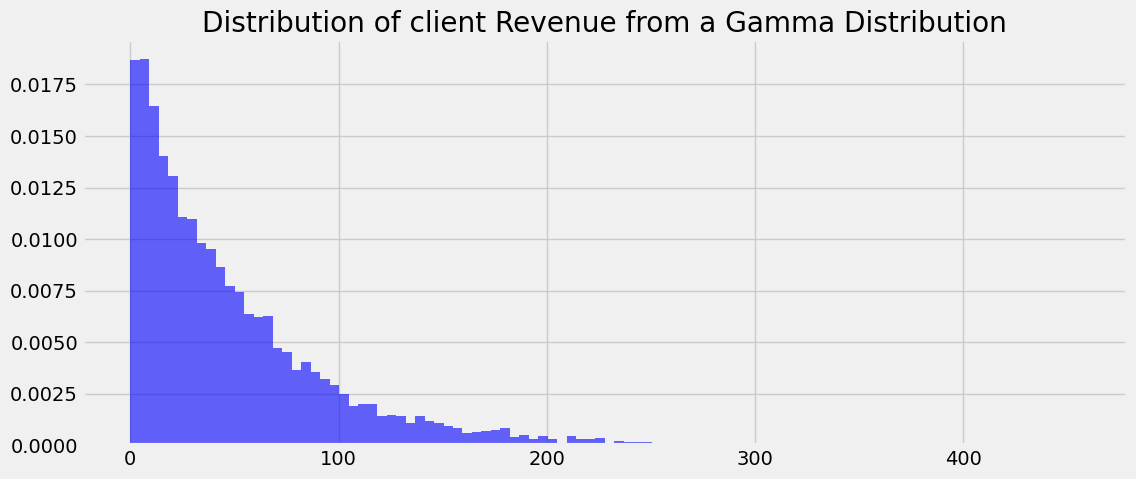

In [2]:
## sedding for reprodducibility  
np.random.seed(123)
## stating the parameters of the gamma distribution  
## The shape parameter sometimes called aplha determines the shape of thee distribution
shape = 1.0
## the scale parameter , determines the spread of the distribution
scale = 50.0
## generating random data from the gamma distribution  
revenue = gamma.rvs(shape,scale = scale, size=10000)
## plotting the data  
plt.hist(revenue , bins=100, density=True , alpha=0.6,color='blue')
plt.title('Distribution of client Revenue from a Gamma Distribution',loc='center')
plt.show()

`Mean of the Distribution`

In [3]:
console.print(f'The Mean Distribution of the client revenue is = {revenue.mean():.1f}', style = 'bold Underline')

The Mean Distribution of the client revenue is = 49.4

`Central Limit Thereom`

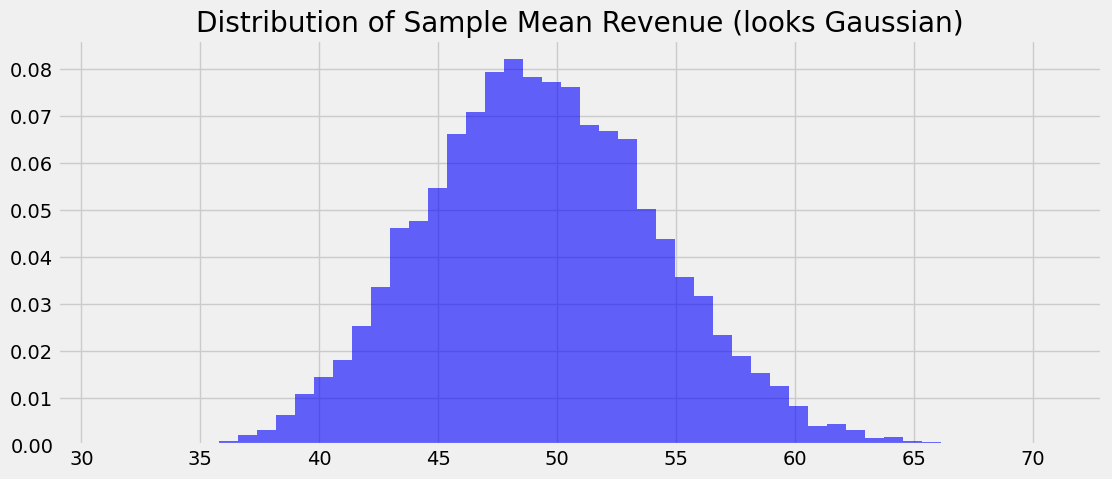

Mean of the Sample Means is = 49.4

In [6]:
## selecting the original samples , so that we loop through
num_samples = 10000 
## The sample size , remember the sample size should be greater or equal to 30 , i choose 100 samples
sample_size = 100   
## Container to store my sample means
sample_means = [] 

## i decided to iterate over the 10000 samples
for i in range(num_samples):
    ## Am sampling 100 samples from my original data , revenue
    ## Am also Sampling without replacemet , meaning each sample is unique 
    random_sample = np.random.choice(revenue, size=sample_size, replace=False)
    ## after samplinng am splicy storing it , in my container  and finding the average for that specific sample
    ## This will create 10,000 different samples , each having its own mean and its independent of each other
    sample_means.append(random_sample.mean())
## then after converting the container into a series for easily manipulation
sample_means = pd.Series(sample_means)
## then am plotting 
plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='blue')
plt.title("Distribution of Sample Mean Revenue (looks Gaussian)")
plt.show()
## printing the mean of the sample means  
console.print(f'Mean of the Sample Means is = {sample_means.mean():.1f}')

`NOTE`:
* The `CLT` ensures that the distribution of 10,000 means will approximate a normal distribution , even though the original revenue client data was following `Gamma` distrubtion

`END GOAL OF THE DEMONSTRATION`

*  What i was trying to potray here , is during Experimentations when  Comparing difference betweeen means two different variables , lets say Treatment and Control , since it involves using the T-test and one of the assumptios of the T- test is Normality of the data , Mojarity look at the distribution of the Underling data like now , Revenue since its not normally distributed , they Try ways to use another statiscal Test

* The point here is , the distribution of the underlying data doesnot need to be normally distributed  inorder for me to perform a T-test but the distributtion of the sample means that should be approximately normally distributed inorder for me to  perform a T-test
  
* So , the Underlying distribution  like Revenue doesnot need to be normally distributed for me to perform a ttest, it can follow any distribution  skewed , binomial even exponetial

* So when i repeatedlly take random samples from the population and calculated the mean for each sample , the distribution of the sample means form a `normal distribution` as long as the sample size is `large enough`